## Importing all the necassary libraries

In [1]:
import pandas as pd
import numpy as np
import json
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

pd.reset_option('max_colwidth')

nltk.download('words')  
nltk.download('punkt')  

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sherow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Analysis and Data Cleaning ##

Loading the Dataset from a CSV File

In [2]:
# Load the dataset from a CSV file into the 'df' DataFrame.
df = pd.read_csv(r'c:\YoutubeProject\US_youtube_trending_data.csv')

Displaying Information About the Dataset

In [3]:
# Use df.info() to display details about the DataFrame, including column names and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229588 entries, 0 to 229587
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           229588 non-null  object
 1   title              229588 non-null  object
 2   publishedAt        229588 non-null  object
 3   channelId          229588 non-null  object
 4   channelTitle       229588 non-null  object
 5   categoryId         229588 non-null  int64 
 6   trending_date      229588 non-null  object
 7   tags               229588 non-null  object
 8   view_count         229588 non-null  int64 
 9   likes              229588 non-null  int64 
 10  dislikes           229588 non-null  int64 
 11  comment_count      229588 non-null  int64 
 12  thumbnail_link     229588 non-null  object
 13  comments_disabled  229588 non-null  bool  
 14  ratings_disabled   229588 non-null  bool  
 15  description        225188 non-null  object
dtypes: bool(2), int64(5)

Dropping Unnecessary Columns

In [4]:
# Remove the 'thumbnail_link' column
df.drop('thumbnail_link', axis=1, inplace=True)

# Remove the 'video_id' column
df.drop('video_id', axis=1, inplace=True)

# Remove the 'channelId' column
df.drop('channelId', axis=1, inplace=True)

df = df[df['dislikes']!=0]

df= df[df['tags']!= '[none]']

In [52]:
correlation_viewlike = df['likes'].corr(df['view_count'])
correlation_viewdislikes = df['dislikes'].corr(df['view_count'])
correlation_viewcomments = df['comment_count'].corr(df['view_count'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_viewlike:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_viewdislikes:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'comment_count': {correlation_viewcomments:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.79
Correlation between 'top_10_percent_count' and 'dislikes': 0.59
Correlation between 'top_10_percent_count' and 'comment_count': 0.60


Loading Video Genres from a JSON File

In [5]:
# Open the JSON file containing category information
with open(r'c:\YoutubeProject\US_category_id.json') as f:
    category_dict = json.load(f)  # Store category names and their numerical IDs

# Replace numerical category IDs with their corresponding category names
df['categoryName'] = df['categoryId'].astype(str).replace(category_dict)

# Drop the 'categoryId' column to retain only the category names
df = df.drop('categoryId', axis=1)

df.head(2)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming


In [6]:
df = df.drop_duplicates(subset='title')

Turning tags into a list format

In [7]:
# Defining a function for clean text
def clean_tag(tags):
    return [tag.lower().replace('"', '') for tag in tags.split('|')]

# Applying clean textf function for df
df['tags'] = df['tags'].apply(clean_tag)

df = df[df['tags'].apply(lambda x: '[none]' not in x)]

Tokenize title column and removing stop words

In [8]:
# Function to clean and preprocess a title
def clean_title(title):
    # Convert to lowercase
    title = title.lower()
    
    # Remove special characters, numbers, and punctuation
    title = re.sub(r'[^a-zA-Z\s]', '', title)
    
    # Tokenize the title
    tokens = title.split()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Rejoin the cleaned tokens
    cleaned_title = ' '.join(tokens)
    
    return cleaned_title

# Apply the clean_title function to the 'title' column
df['cleaned_title'] = df['title'].apply(clean_title)
df.head(2)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,cleaned_title
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,2020-08-12T00:00:00Z,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,35313,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,asked girlfriend
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,2020-08-12T00:00:00Z,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,16549,False,False,"While running her own modding shop, Ramya Pare...",Gaming,apex legends stories outlands endorsement


Creating a Different Dataset Using Only the **Sports**, **People & Blogs** and **Games** Genre

In [9]:
dfSport = df[df['categoryName'] == 'Sports']
dfPpl=df[df['categoryName'] == 'People & Blogs']
dfGame=df[df['categoryName'] == 'Gaming']

dfSport = dfSport.reset_index(drop=True)
dfSport = dfSport[dfSport['dislikes']!=0]
dfSport.head(2)

,title,publishedAt,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description,categoryName,cleaned_title
0,Shannon reacts to Kyle Kuzma's game-winning sh...,2020-08-11T16:21:47Z,Skip and Shannon: UNDISPUTED,2020-08-12T00:00:00Z,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,1647,False,False,LeBron and the Lakers finally snapped their 3-...,Sports,shannon reacts kyle kuzmas gamewinning shot im...
1,Giannis Gets Ejected After Headbutting Mo Wagner,2020-08-12T02:30:32Z,Bleacher Report,2020-08-12T00:00:00Z,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,2441,False,False,"In a random and wild sequence of events, Giann...",Sports,giannis gets ejected headbutting mo wagner


## Exploring the Relationship Between Video Popularity and Tags

**Dropping unecessary columns**

In [10]:
dfSport=dfSport.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','cleaned_title'], axis=1)

dfPpl=dfPpl.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','cleaned_title'], axis=1)

dfGame=dfGame.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','cleaned_title'], axis=1)

dfSport.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName
0,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,Sports
1,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,Sports


In [11]:
dfSport['LikesDislikeSum']=dfSport['likes'] + dfSport['dislikes']

dfGame['LikesDislikeSum']=dfGame['likes'] + dfGame['dislikes'] 

dfPpl['LikesDislikeSum']=dfPpl['likes'] + dfPpl['dislikes']

**Extracting tags into a dataframe**

For **dfSports** Dataframe

In [12]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags = [tag for tags in dfSport['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies = Counter(all_tags)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df = pd.DataFrame(tag_frequencies.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df = tag_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df = tag_frequencies_df.reset_index(drop=True)
tag_frequencies_df

,Tag,Frequency
0,highlights,455
1,football,451
2,nba,400
3,basketball,295
4,sports,268
...,...,...
14006,tiger woods responsive,1
14007,us-sport,1
14008,woods accident,1
14009,woods crash,1


For **dfPpl** Dataframe

In [13]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags_P = [tag for tags in dfPpl['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies_P = Counter(all_tags_P)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df_P = pd.DataFrame(tag_frequencies_P.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df_P = tag_frequencies_df_P.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df_P = tag_frequencies_df_P.reset_index(drop=True)
tag_frequencies_df_P

,Tag,Frequency
0,funny,177
1,vlog,137
2,comedy,111
3,family,91
4,tiktok,86
...,...,...
9151,#bam,1
9152,#bambam,1
9153,#jinyoung,1
9154,#youngjae,1


For **dfGame** Dataframe

In [14]:
# Flatten the list of lists in the 'tags' column into a single list of tags
all_tags_G = [tag for tags in dfGame['tags'] for tag in tags]

# Count the frequency of each tag
tag_frequencies_G = Counter(all_tags_G)

# Create a DataFrame to store the tag names and their frequencies
tag_frequencies_df_G = pd.DataFrame(tag_frequencies_G.items(), columns=['Tag', 'Frequency'])

# Sort the DataFrame by frequency in descending order
tag_frequencies_df_G = tag_frequencies_df_G.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
tag_frequencies_df_G = tag_frequencies_df_G.reset_index(drop=True)
tag_frequencies_df_G

,Tag,Frequency
0,minecraft,710
1,fortnite,266
2,challenge,259
3,gaming,247
4,funny,234
...,...,...
19018,pirates of the carribean,1
19019,vidoc,1
19020,sirens,1
19021,siren,1


**Top 10% Most Used Words with Stop Words Removed and 1 Values Removed**

Sports

In [15]:
# Calculate the total number of unique tags
total_unique_tags = len(tag_frequencies_df)

# Calculate the top 10% threshold
top_10_percent_threshold = int(total_unique_tags * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags = tag_frequencies_df.head(top_10_percent_threshold)

# Remove tags with a frequency of 1
top_10_percent_tags = top_10_percent_tags[top_10_percent_tags['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags = top_10_percent_tags.reset_index(drop=True)
top_10_percent_tags

,Tag,Frequency
0,highlights,455
1,football,451
2,nba,400
3,basketball,295
4,sports,268
...,...,...
1396,media,5
1397,jj redick podcast,5
1398,#badminton,5
1399,#bwf,5


People & Blogs

In [16]:
# Calculate the total number of unique tags
total_unique_tags_P = len(tag_frequencies_df_P)

# Calculate the top 10% threshold
top_10_percent_threshold_P = int(total_unique_tags_P * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags_P = tag_frequencies_df_P.head(top_10_percent_threshold_P)

# Remove tags with a frequency of 1
top_10_percent_tags_P = top_10_percent_tags_P[top_10_percent_tags_P['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags_P = top_10_percent_tags_P.reset_index(drop=True)
top_10_percent_tags_P

,Tag,Frequency
0,funny,177
1,vlog,137
2,comedy,111
3,family,91
4,tiktok,86
...,...,...
910,matthew beem,4
911,beem team,4
912,mbeem10,4
913,son,4


Games

In [17]:
# Calculate the total number of unique tags
total_unique_tags_G = len(tag_frequencies_df_G)

# Calculate the top 10% threshold
top_10_percent_threshold_G = int(total_unique_tags_G * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_tags_G = tag_frequencies_df_G.head(top_10_percent_threshold_G)

# Remove tags with a frequency of 1
top_10_percent_tags_G = top_10_percent_tags_G[top_10_percent_tags_G['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_tags_G = top_10_percent_tags_G.reset_index(drop=True)
top_10_percent_tags_G

,Tag,Frequency
0,minecraft,710
1,fortnite,266
2,challenge,259
3,gaming,247
4,funny,234
...,...,...
1897,rage,4
1898,papafeargaming,4
1899,remaster,4
1900,playstation 5 review,4


**Identifying the Presence of Top 10%**

Sports

In [18]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words = top_10_percent_tags['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set = set(top_10_percent_words)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfSport['TagUsage'] = dfSport['tags'].apply(contains_top_words)

People & Blogs

In [19]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words_P = top_10_percent_tags_P['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set_P = set(top_10_percent_words_P)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set_P:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfPpl['TagUsage'] = dfPpl['tags'].apply(contains_top_words)

Games

In [20]:
# Extract the tags from the 'Tag' column of the top_10_percent_tags DataFrame
top_10_percent_words_G = top_10_percent_tags_G['Tag'].tolist()

# Create a set of the top 10% most used words
top_10_percent_words_set_G = set(top_10_percent_words_G)

# Function to check if any word from the top 10% is present in the tags list
def contains_top_words(tags):
    for tag in tags:
        if tag in top_10_percent_words_set_G:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'tags' column of the dfSport DataFrame
dfGame['TagUsage'] = dfGame['tags'].apply(contains_top_words)

**Counting the Presence of the top 10% Most Used Tages**

Sports

In [21]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags['Tag'].values:
            count += 1
    return count
dfSport['top_10_percent_count'] = dfSport['tags'].apply(count_top_tags)
dfSport.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName,LikesDislikeSum,TagUsage,top_10_percent_count
0,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,"[fox, fox sports, fs1, fox sports 1, undispute...",540613,7155,308,Sports,7463,Used,31
1,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,"[bleacher report, br, nba, giannis, giannis an...",756814,8278,331,Sports,8609,Used,7


People & Blogs

In [22]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags_P['Tag'].values:
            count += 1
    return count
dfPpl['top_10_percent_count'] = dfPpl['tags'].apply(count_top_tags)
dfPpl.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName,LikesDislikeSum,TagUsage,top_10_percent_count
0,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,"[brawadis, prank, basketball, skits, ghost, fu...",1514614,156908,5855,People & Blogs,162763,Used,15
11,Try Not To Laugh Challenge #51,Smosh Pit,"[smosh, smosh pit, smosh games, funny, comedy]",591837,44168,409,People & Blogs,44577,Used,5


Games

In [23]:
def count_top_tags(tags):
    count = 0
    for tag in tags:
        if tag in top_10_percent_tags_G['Tag'].values:
            count += 1
    return count
dfGame['top_10_percent_count'] = dfGame['tags'].apply(count_top_tags)
dfGame.head(2)

,title,channelTitle,tags,view_count,likes,dislikes,categoryName,LikesDislikeSum,TagUsage,top_10_percent_count
1,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,"[apex legends, apex legends characters, new ap...",2381688,146739,2794,Gaming,149533,Used,24
12,Rainbow Six Siege: Operation Shadow Legacy Rev...,Ubisoft North America,"[r6, r6s, siege, new siege, new operators, new...",320872,14288,774,Gaming,15062,Used,8


In [24]:
## Corelation between Tags and reaction (Likes and Dislikes)
correlation_GameTagLikeDislike = dfGame['top_10_percent_count'].corr(dfGame['LikesDislikeSum'])

correlation_SportTagLikeDislike = dfSport['top_10_percent_count'].corr(dfSport['LikesDislikeSum'])

correlation_PeopleTagLikeDislike = dfPpl['top_10_percent_count'].corr(dfPpl['LikesDislikeSum'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': {correlation_GameTagLikeDislike:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': {correlation_SportTagLikeDislike:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': {correlation_PeopleTagLikeDislike:.2f}")


Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': 0.11
Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': 0.21
Correlation between 'top_10_percent_count' and 'LikesDislikeSum	': 0.12


**Creating graphs Displaying the top 10% tags' involvement**

Sports

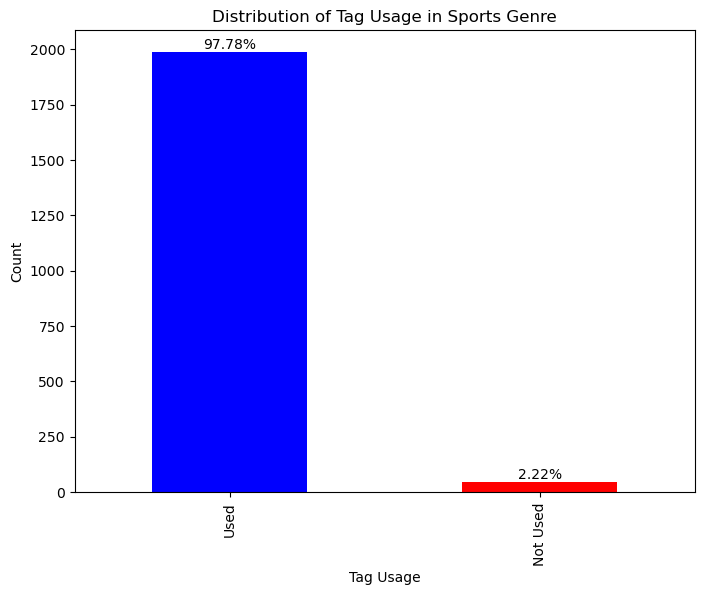

In [25]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfSport['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage in Sports Genre')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

People & Blogs

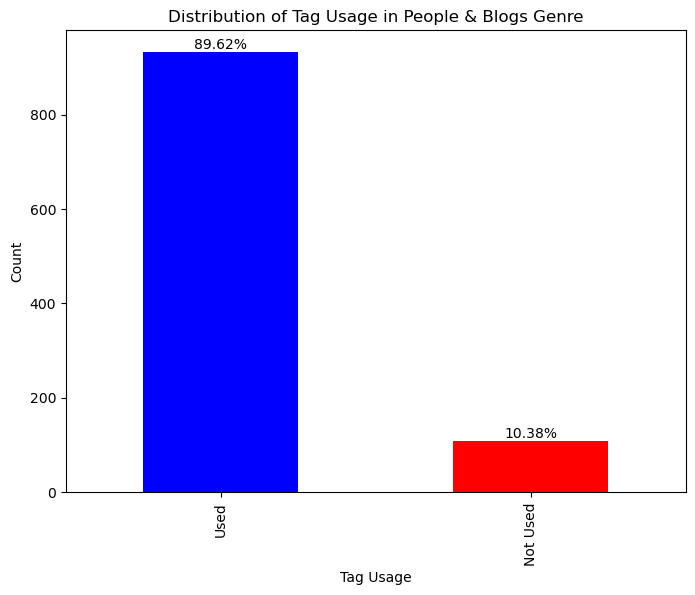

In [26]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfPpl['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage in People & Blogs Genre')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

Games

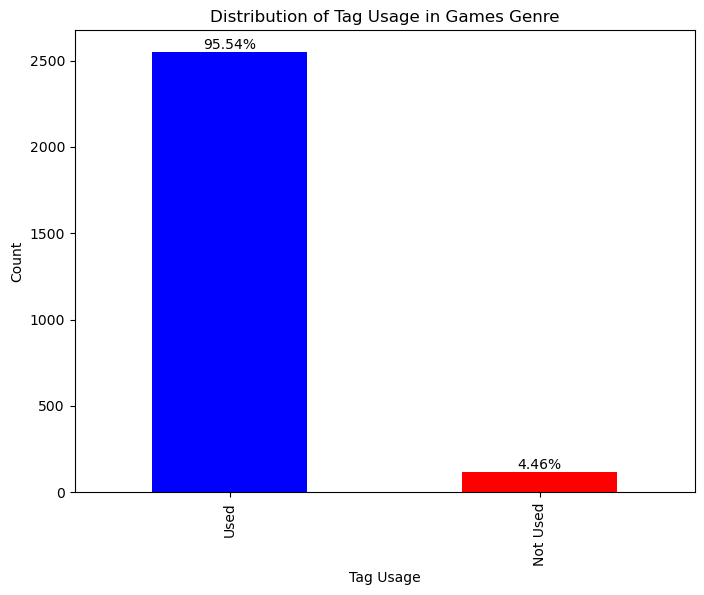

In [27]:
# Count the frequencies of each unique value in the 'TagUsage' column
tag_usage_counts = dfGame['TagUsage'].value_counts()

# Calculate the percentage for each 'TagUsage' category
tag_usage_percentages = tag_usage_counts / tag_usage_counts.sum() * 100

# Define custom colors for each 'TagUsage'
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = tag_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Tag Usage in Games Genre')
plt.xlabel('Tag Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(tag_usage_counts):
    ax.text(i, v, f'{tag_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

**Finding the correlation between tags and views, likes, dislikes**

Sports

In [28]:
filtered_df = dfSport[(dfSport['top_10_percent_count'] != 0)]

correlation_view = filtered_df['view_count'].corr(filtered_df['top_10_percent_count'])
correlation_like = filtered_df['top_10_percent_count'].corr(filtered_df['likes'])
correlation_dislike = filtered_df['top_10_percent_count'].corr(filtered_df['dislikes'])

print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_like:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislike:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.19
Correlation between 'top_10_percent_count' and 'likes': 0.21
Correlation between 'top_10_percent_count' and 'dislikes': 0.12


Games

In [29]:
filtered_df = dfGame[(dfGame['top_10_percent_count'] != 0)]

correlation_view = filtered_df['view_count'].corr(filtered_df['top_10_percent_count'])
correlation_like = filtered_df['top_10_percent_count'].corr(filtered_df['likes'])
correlation_dislike = filtered_df['top_10_percent_count'].corr(filtered_df['dislikes'])

print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_like:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislike:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.09
Correlation between 'top_10_percent_count' and 'likes': 0.10
Correlation between 'top_10_percent_count' and 'dislikes': 0.06


People & Blogs

In [30]:
filtered_df = dfPpl[(dfPpl['top_10_percent_count'] != 0)]

correlation_view = filtered_df['view_count'].corr(filtered_df['top_10_percent_count'])
correlation_like = filtered_df['top_10_percent_count'].corr(filtered_df['likes'])
correlation_dislike = filtered_df['top_10_percent_count'].corr(filtered_df['dislikes'])

print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_like:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislike:.2f}")

Correlation between 'top_10_percent_count' and 'view_count': 0.15
Correlation between 'top_10_percent_count' and 'likes': 0.13
Correlation between 'top_10_percent_count' and 'dislikes': -0.02


Since there is no deep correlation between the videos' tags and the views likes and dislikes, the videos' success is **not** dependent by this research

## Exploring Relationship in Videos by the Video Title ##

**Finding the Correlation Between Video Title Lenght and View Count**

In [31]:
# Add a new column for title length
df['title_length'] = df['title'].apply(len)

# Calculate the correlation between title length and view count
correlation = df['title_length'].corr(df['view_count'])

# Print the correlation value
print(f"Correlation between Title Length and View Count: {correlation:.2f}")

Correlation between Title Length and View Count: -0.05


There is **no** correlation

**Resetting All Dataframes**

In [32]:
dfSport = df[df['categoryName'] == 'Sports']

dfSport=dfSport.drop(['comment_count', 'ratings_disabled','description','publishedAt','trending_date','comments_disabled','tags'], axis=1)

dfSport.head(2)

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length
40,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,540613,7155,308,Sports,shannon reacts kyle kuzmas gamewinning shot im...,100
43,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,756814,8278,331,Sports,giannis gets ejected headbutting mo wagner,48


**Counting All Words From The Cleaned Title Colum**

In [33]:
dfSport['LikesDislikeSum']=dfSport['likes'] + dfSport['dislikes']

In [34]:
column_list = dfSport['cleaned_title'].tolist()

column_list = [string.split() for string in column_list]

flat_list = [word for sublist in column_list for word in sublist]

word_counts = Counter(flat_list)


**Creating Dataframes Showing the Frequency of Words**

In [35]:
# Create a DataFrame to store the tag names and their frequencies
title_frequencies_df = pd.DataFrame(word_counts.items(), columns=['Title', 'Frequency'])

# Sort the DataFrame by frequency in descending order
title_frequencies_df = title_frequencies_df.sort_values(by='Frequency', ascending=False)

# Reset the index of the DataFrame
title_frequencies_df = title_frequencies_df.reset_index(drop=True)
title_frequencies_df

,Title,Frequency
0,highlights,770
1,vs,565
2,game,261
3,full,218
4,sports,190
...,...,...
3871,supercopa,1
3872,bruno,1
3873,fernandes,1
3874,punching,1


**Determining the top 10% Most Frequent Title Words and Getting Rid of Frequencies of 1**

In [36]:
# Calculate the total number of unique tags
total_unique_title = len(title_frequencies_df)

# Calculate the top 10% threshold
top_10_percent = int(total_unique_title * 0.10)

# Filter the tags to get the top 10% most frequent tags
top_10_percent_titles = title_frequencies_df.head(top_10_percent)

# Remove tags with a frequency of 1
top_10_percent_titles = top_10_percent_titles[top_10_percent_titles['Frequency'] != 1]

# Reset the index of the DataFrame
top_10_percent_titles = top_10_percent_titles.reset_index(drop=True)
top_10_percent_titles

,Title,Frequency
0,highlights,770
1,vs,565
2,game,261
3,full,218
4,sports,190
...,...,...
382,ariel,8
383,opening,8
384,hotspur,8
385,thunder,8


**Determining if a Top 10% Word Has Been Used**

In [37]:
# Create a set of the top 10% most frequent words
top_10_percent_words_set = set(top_10_percent_titles['Title'])

# Function to check if any word from the top 10% is present in the cleaned titles
def contains_top_words(title):
    title = title.lower()  
    words = title.split()
    for word in words:
        if word in top_10_percent_words_set:
            return 'Used'
    return 'Not Used'

# Apply the function to the 'cleaned_title' column of the DataFrame
dfSport['top_words_usage'] = dfSport['cleaned_title'].apply(contains_top_words)

# Count the occurrences of "Used" and "Not Used" in the 'top_words_usage' column
usage_counts = dfSport['top_words_usage'].value_counts()

# Display the counts
print(usage_counts)

Used        1969
Not Used      62
Name: top_words_usage, dtype: int64


**Counting the Frequencies Used of the Top 10%**

In [38]:
kenanK_TV_df = dfSport[dfSport['channelTitle'] == 'kenanK TV']
kenanK_TV_df

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length,LikesDislikeSum,top_words_usage
819,What Really Happened to Sean O'Malley vs Marlo...,kenanK TV,251918,953,900,Sports,really happened sean omalley vs marlon chito v...,87,1853,Used


In [39]:
def count_top_words(title):
    count = 0
    words = title.split()
    for word in words:
        if word in top_10_percent_titles['Title'].values:
            count += 1
    return count

dfSport['top_10_percent_count'] = dfSport['cleaned_title'].apply(count_top_words)
dfSport.head()

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length,LikesDislikeSum,top_words_usage,top_10_percent_count
40,Shannon reacts to Kyle Kuzma's game-winning sh...,Skip and Shannon: UNDISPUTED,540613,7155,308,Sports,shannon reacts kyle kuzmas gamewinning shot im...,100,7463,Used,7
43,Giannis Gets Ejected After Headbutting Mo Wagner,Bleacher Report,756814,8278,331,Sports,giannis gets ejected headbutting mo wagner,48,8609,Used,2
47,TRAIL BLAZERS at MAVERICKS | FULL GAME HIGHLIG...,NBA,937569,10160,405,Sports,trail blazers mavericks full game highlights a...,67,10565,Used,7
65,'Don't mess with Dame Dolla' - Stephen A. reac...,ESPN,791489,13242,325,Sports,dont mess dame dolla stephen reacts lillards b...,96,13567,Used,6
68,NUGGETS at LAKERS | FULL GAME HIGHLIGHTS | Aug...,NBA,2103682,22243,907,Sports,nuggets lakers full game highlights august,58,23150,Used,6


**Creating a Graph to See Theq Frequency of Words**

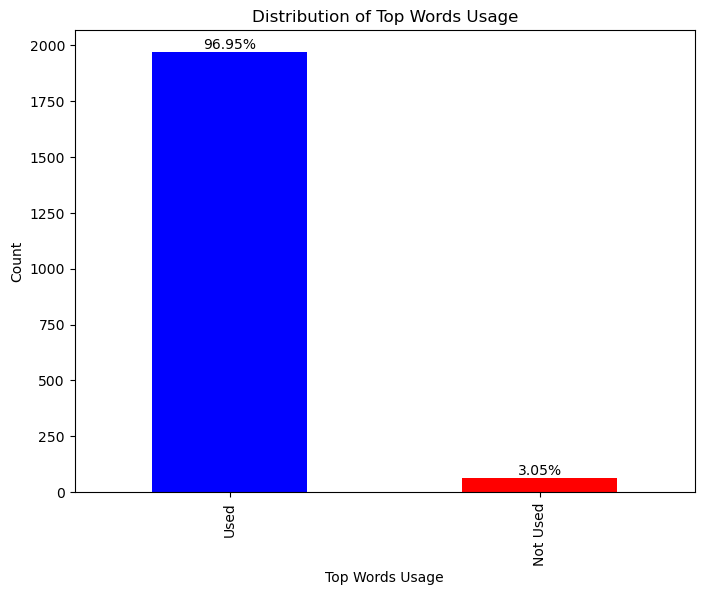

In [41]:
# Calculate the frequencies of 'top_words_usage' values
top_words_usage_counts = dfSport['top_words_usage'].value_counts()

# Calculate the percentage for each 'top_words_usage' category
top_words_usage_percentages = top_words_usage_counts / top_words_usage_counts.sum() * 100

# Define custom colors for the bars
custom_colors = ['blue', 'red']

# Create a bar chart with custom colors and annotations for percentages
plt.figure(figsize=(8, 6))
ax = top_words_usage_counts.plot(kind='bar', color=custom_colors)
plt.title('Distribution of Top Words Usage')
plt.xlabel('Top Words Usage')
plt.ylabel('Count')

# Annotate the bars with percentages
for i, v in enumerate(top_words_usage_counts):
    ax.text(i, v, f'{top_words_usage_percentages[i]:.2f}%', ha='center', va='bottom')

# Show the chart
plt.show()

**Finding the Correlation Between the Top 10% Most Frequent Words and Views, Likes, Dislikes**

In [42]:


correlation_view = dfSport['top_10_percent_count'].corr(dfSport['view_count'])
correlation_likes = dfSport['top_10_percent_count'].corr(dfSport['likes'])
correlation_dislikes = dfSport['top_10_percent_count'].corr(dfSport['dislikes'])
correlation_length = dfSport['title_length'].corr(dfSport['dislikes'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_view:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'likes': {correlation_likes:.2f}")
print(f"Correlation between 'top_10_percent_count' and 'dislikes': {correlation_dislikes:.2f}")


Correlation between 'top_10_percent_count' and 'view_count': -0.01
Correlation between 'top_10_percent_count' and 'likes': -0.20
Correlation between 'top_10_percent_count' and 'dislikes': -0.01
Correlation between 'top_10_percent_count' and 'TitleLenght': -0.08


In [49]:

correlation_SportTitleLikeDislike = dfSport['top_10_percent_count'].corr(dfSport['LikesDislikeSum'])

# Display the correlations

print(f"Correlation between 'top_10_percent_count' and 'LikesDislikeSum': {correlation_SportTitleLikeDislike:.2f}")


Correlation between 'top_10_percent_count' and 'LikesDislikeSum': -0.19


Ther is **no** Correlation

**Most Watched Channels**

In [43]:

dfsports_sorted = dfSport.sort_values(by='view_count', ascending=False)


total_rows = len(dfsports_sorted)


top_10_percent = int(total_rows * 0.10)


top_10_percent_channels = dfsports_sorted.head(top_10_percent)


In [44]:
top_10_percent_channels

,title,channelTitle,view_count,likes,dislikes,categoryName,cleaned_title,title_length,LikesDislikeSum,top_words_usage,top_10_percent_count
22803,Pandya's power seals series win for India with...,cricket.com.au,26361663,637050,16679,Sports,pandyas power seals series win india epic chas...,83,653729,Used,5
75400,India Claim Thrilling Win! | England v India -...,England & Wales Cricket Board,20343912,603307,12391,Sports,india claim thrilling win england v india day ...,93,615698,Used,8
22606,India take 1-0 lead after dramatic T20 opener ...,cricket.com.au,18669526,406897,14006,Sports,india take lead dramatic opener dettol ti series,71,420903,Used,3
79605,India Win To Take 2-1 Lead | England v India -...,England & Wales Cricket Board,18020798,430703,12117,Sports,india win take lead england v india day highli...,93,442820,Used,10
22217,India hold their nerve to win ODI epic in Canb...,cricket.com.au,17895564,354313,14621,Sports,india hold nerve win odi epic canberra dettol ...,75,368934,Used,4
...,...,...,...,...,...,...,...,...,...,...,...
47794,LAKERS at NETS | FULL GAME HIGHLIGHTS | April ...,NBA,2449511,24455,1193,Sports,lakers nets full game highlights april,54,25648,Used,5
56304,#7 LAKERS at #2 SUNS | FULL GAME HIGHLIGHTS | ...,NBA,2442728,24917,1021,Sports,lakers suns full game highlights may,58,25938,Used,6
21462,"Full Mike Tyson v Roy Jones Jr weigh-ins show,...",BT Sport Boxing,2435674,21895,1041,Sports,full mike tyson v roy jones jr weighins show p...,74,22936,Used,9
51823,Qualifying Highlights | 2021 Portuguese Grand ...,FORMULA 1,2432373,53831,639,Sports,qualifying highlights portuguese grand prix,50,54470,Used,4


In [45]:
channel_stats = dfSport.groupby('channelTitle').agg({
    'view_count': 'sum',
    'dislikes': 'sum',
    'likes': 'sum'
    
}).reset_index()

# Display the resulting DataFrame
channel_stats

,channelTitle,view_count,dislikes,likes
0,2HYPE,5086915,5373,308980
1,ACC Digital Network,355883,146,2978
2,AFTV,3298781,7406,135123
3,ARMWRESTLING TV,575673,241,20246
4,Alabama Crimson Tide on AL.com,287722,104,3609
...,...,...,...,...
326,cricket.com.au,92416132,65230,2318598
327,dodgerfilms,1236378,482,38562
328,kenanK TV,251918,900,953
329,nbagleague,1519729,431,14368


In [46]:
channel_stats['likesdislikedsum']=channel_stats['likes'] + channel_stats['dislikes']
channel_stats['ldsumdivviews']=channel_stats['likesdislikedsum'] / channel_stats['view_count']
channel_stats['likestotal']=channel_stats['likes'] / channel_stats['likesdislikedsum']
channel_stats['dislikestotal']=channel_stats['dislikes'] / channel_stats['likesdislikedsum']
channel_stats.head(100)

,channelTitle,view_count,dislikes,likes,likesdislikedsum,ldsumdivviews,likestotal,dislikestotal
0,2HYPE,5086915,5373,308980,314353,0.061796,0.982908,0.017092
1,ACC Digital Network,355883,146,2978,3124,0.008778,0.953265,0.046735
2,AFTV,3298781,7406,135123,142529,0.043207,0.948039,0.051961
3,ARMWRESTLING TV,575673,241,20246,20487,0.035588,0.988236,0.011764
4,Alabama Crimson Tide on AL.com,287722,104,3609,3713,0.012905,0.971990,0.028010
...,...,...,...,...,...,...,...,...
95,Fore Play Golf,338946,71,6073,6144,0.018127,0.988444,0.011556
96,Fox Deportes,86848,68,422,490,0.005642,0.861224,0.138776
97,Fox Sports Radio,539062,866,8983,9849,0.018271,0.912072,0.087928
98,Frank Michael Smith,2944097,2696,300682,303378,0.103046,0.991113,0.008887


In [53]:
correlation_viewlike = channel_stats['likes'].corr(channel_stats['view_count'])

# Display the correlations
print(f"Correlation between 'top_10_percent_count' and 'view_count': {correlation_viewlike:.2f}")


Correlation between 'top_10_percent_count' and 'view_count': 0.80


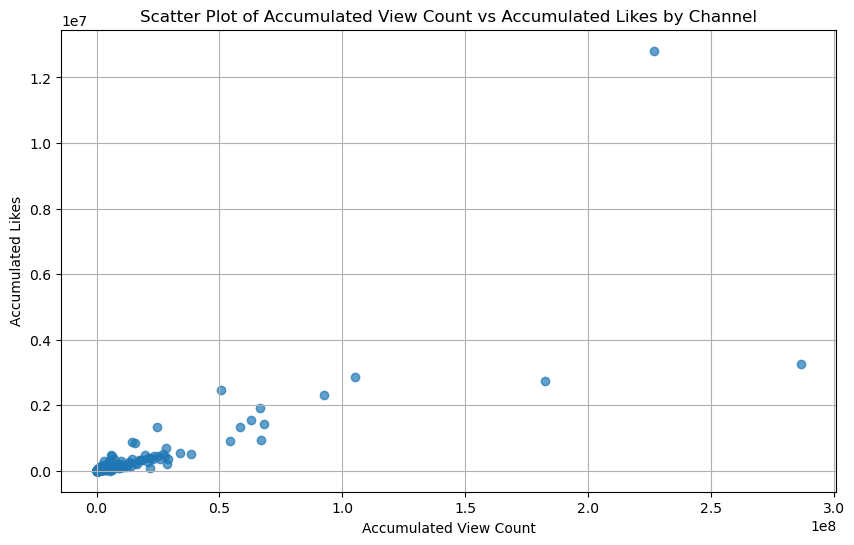

Correlation between 'view_count' and 'likes': 0.80


In [48]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(channel_stats['view_count'], channel_stats['likes'], alpha=0.7)
plt.title('Scatter Plot of Accumulated View Count vs Accumulated Likes by Channel')
plt.xlabel('Accumulated View Count')
plt.ylabel('Accumulated Likes')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = channel_stats['view_count'].corr(channel_stats['likes'])
print(f"Correlation between 'view_count' and 'likes': {correlation:.2f}")